# Заглянем глубже: метод главных компонент

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Знакомство с методом главных компонент
Метод главных компонент - быстрый и гибкий метод машинного обучения без учителя, предназначенный для понижения размерности данных. Рассмотрим следующие 200 точек:

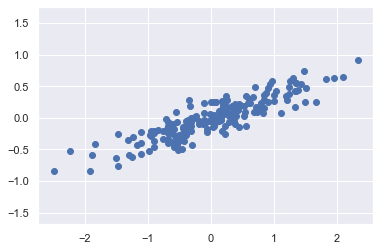

In [2]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

Задача машинного обучения без учителя состоит в выяснении *зависимости* между велечинами *х* и *у*, а не в *предсказании* значений велечины *у* по значениям велечины *х*.

В методе главных компонент выполняется количественная оценка этой зависимости путем нахождения списка *главных осей координат* (principal axes) данных и их использования для описания набора данных.

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(n_components=2)

При обучении алгоритм определяет некоторые относящиеся к данным велечины, самые важные из них - компоненты и объяснимая дисперсия (explained variance):

In [5]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [6]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Чтобы понять смысл этих чисел, визуализируем их в виде векторов над входными данными, используя компоненты для задания направления векторов, а объяснимую дисперсию - в качестве квадратов их длин:

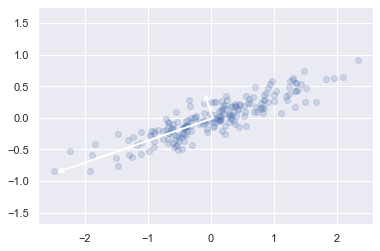

In [7]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

Эти векторы отражают *главные оси координат* данных, а длина соответствует "важности" роли данной оси при описании распределения данных, точнее говоря, это мера дисперсии данных при проекции на эту ось. Проекции точек данных на главные оси и есть главные компоненты данных.
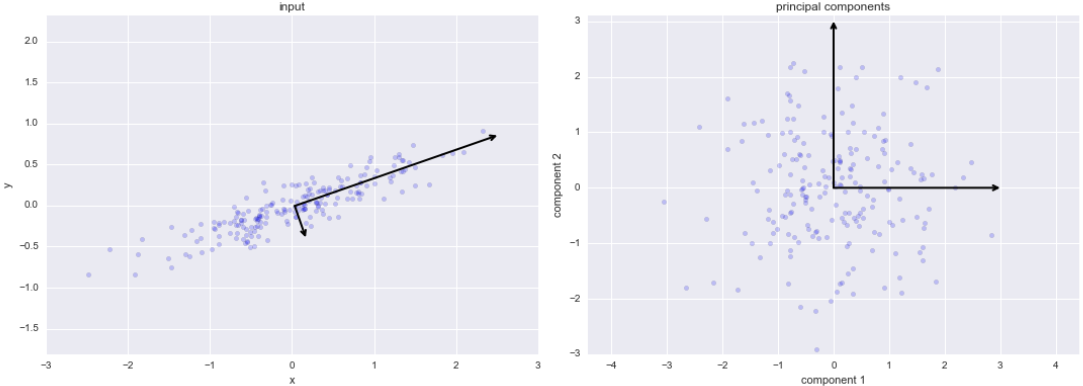
*Преобразованные главные оси данных*

Это преобразование от осей координат данных к главным осям представляет собой *аффинное преобразование*. По существу, это значит, что она состоит из сдвига, вращения и пропорционального масштабирования.
## РСА как метод понижения размерности
Использования метода РСА для понижения размерности включает обнуление одной или нескольких из наименьших главных компонент, в результате чего данные проецируются на пространство меньшей размерности с сохранением максимальной дисперсии данных. Пример использования РСА в качестве понижающего размерность преобразования:

In [8]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


Преобразованные данные стали одномерными. Для лучшего понимания эффекта этого понижения размерности можно выполнить обратное преобразование этих данных и нарисовать их рядом с исходными:

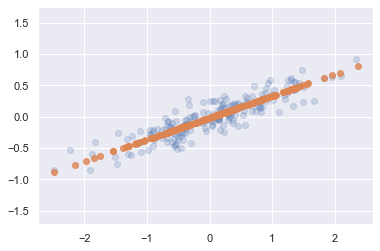

In [9]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

Информация по наименее важной главной оси\осям координат уничтожается и остается только компонента данных с максимальной дисперсией. Отсекаемая часть дисперсии является приближенной мерой того, сколько "информации" отбрасывается при этом понижении размерности. Несмотря на понижение размерности данных на 50%, общая зависимость между точками данных по большей части была сохранена.
## Использование метода РСА для визуализации:  рукописные цифры

In [10]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [11]:
pca = PCA(2)  # Проекция из 64-мерного в двумерное пространство
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


Теперь можно построить график двух главных компонент каждой точки, чтобы получить больше информации о наших данных:

C:\Users\Георгий\AppData\Local\Temp\ipykernel_18384\2422214433.py:6: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar();


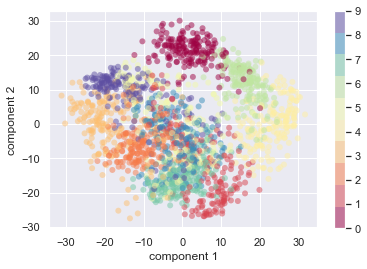

In [23]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('Spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Что означают эти компоненты: полный набор данных представляет собой 64-мерное облако, а эти точки - проекции каждой из точек данных вдоль направлений максимальной дисперсии. По существу, мы нашли оптимальные растяжение и вращение в 64-мерном пространстве, позволяющие увидеть, как цифры выглядят в двух измерениях, причем сделать это с помощью метода без учителя, то есть безотностиельно меток.
## В чем смысл компонент?
Заглянем глубже - что *означает* понижение размерности. Например, каждое изображение из обучающей последовательности описывается набором 64 значений пикселов, которые мы назовем вектором *х*: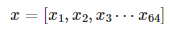
или же: 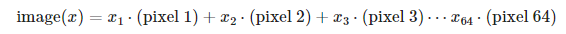
Один из возможных способов понижения размерности этих данных - обнуление большей части базисных векторов. Например, если мы будем использовать только первые 8 пикселов, то получим восьмимерную проекцию данных, но она будет плохо отражать изображение в целом: мы отбрасываем почти 90% пикселов.
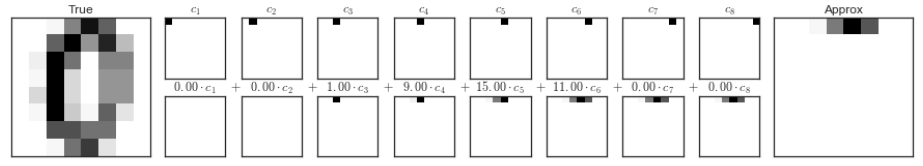
Верхний ряд демонстрирует отдельные пикселы, а нижний - общий вклад этих пикселов в структуру изображения. С помощью только восьми из компонент пиксельного базиса можно сконструировать лишь небольшую часть 64-пиксельного изображения. Продолжив эту последовательность действий и использовав все 64 пиксела, мы бы получили исходное изображение.

Однако попиксельное представление не единственный вариант базиса. Возможно и использование других базисных функций, когда каждый пиксел вносит в каждую из них некий заранее определенный вклад: 
Метод РСА можно рассматривать как процесс выбора оптимальных базисных функций, таких, чтобы комбинация лишь несколько из них было достаточно для удовлетворительного воссоздания основной части элементов набора данных. Главные компоненты, служащие низкоразмерным представлением наших данных, будут в этом случае просто коэффициентами, умножаемыми на каждый из элементов ряда.
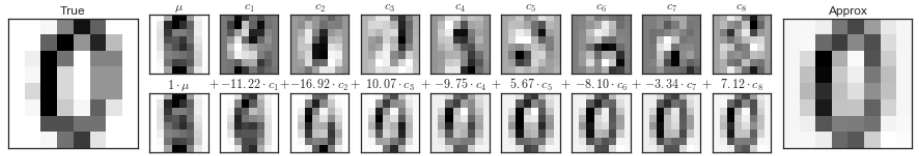
## Выбор количества компонент
Определять это количество можно с помощью представления интегральной *доли объяснимой дисперсии* (explained variance ratio) в виде функции от количества компонент:

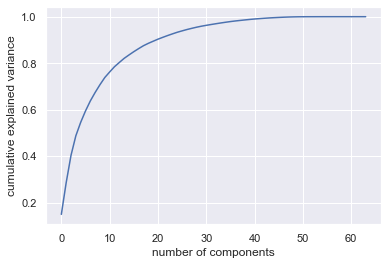

In [24]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

**Интегральная объяснимая дисперсия** - мера сохранения методом РСА информационного наполнения данных.
## Использование метода РСА для фильтрации шума

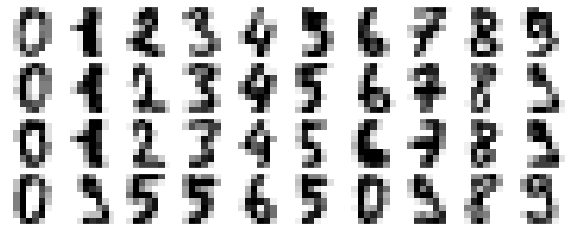

In [25]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

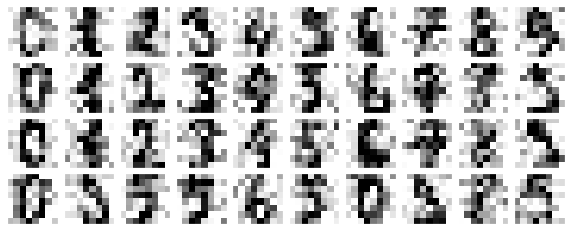

In [26]:
# Добавим случайный шум
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

Обучим алгоритм РСА на этих зашумленных данных, указав, что проекция далжна сохранять 50% дисперсии:

In [27]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

В данном случае 50% дисперсии соответствует 12 главным компонентам. Вычислим эти компоненты, после чего воспользуемся обратным преобразованием для восстановления отфильтрованных цифр:

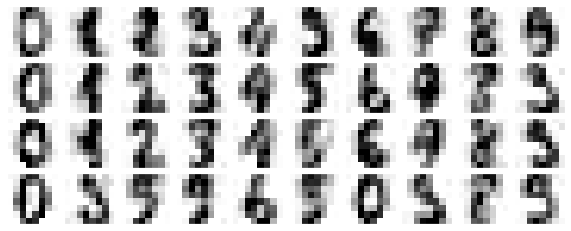

In [28]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

## Пример: метод Eigenfaces

In [29]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Выясним, какие главные оси координат охватывают этот набор данных.

In [32]:
from sklearn.decomposition import PCA
pca = PCA(150, svd_solver = 'randomized')
pca.fit(faces.data)

PCA(n_components=150, svd_solver='randomized')

В нашем случае будет интересно вывести изображения, соответствующие первым нескольким главным компонентам.

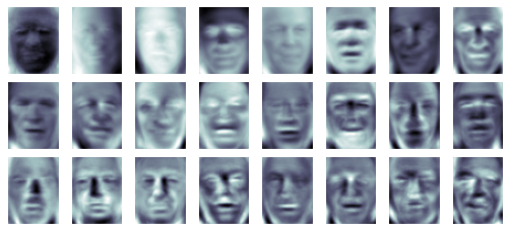

In [33]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

Посмотрим на интегральную дисперсию этих компонент, чтобы выяснить, какая доля информации сохраняется:

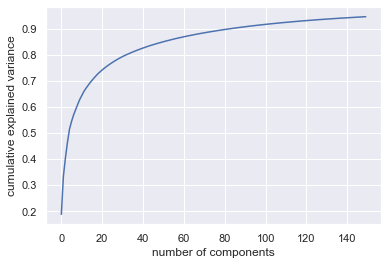

In [34]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

Мы видим, что эти 150 компонентов отвечают за более чем 90% дисперсии. Это дает нам уверенность в том, что при использовании 150 компонент мы сможем восстановить большую часть существенных характеристик данных. Ради уточнения сравним входные изображения с восстановленными из этих 150 компонент:

In [36]:
# Вычисляем компоненты и проекции лиц
pca = PCA(150, svd_solver = 'randomized').fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

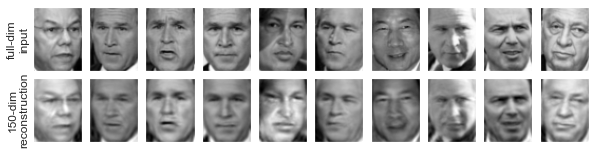

In [37]:
# Рисуем результат
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

В верхнем ряду на этом рисунке показаны входные изображения, а в нижнем - восстановленные на основе лишь 150 из почти 3000 изначальных признаков.